In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_openml

In [27]:
mnist = fetch_openml('mnist_784')
mnist.data.shape

(70000, 784)

In [28]:
mnist.data.head(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data
scaled_mnist_data = scaler.fit_transform(mnist.data)

In [30]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_mnist_data)

PCA()

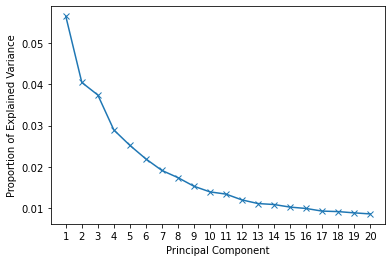

In [31]:
# Plot the explained variance rations of the first 20 principal components
plt.plot(range(1,21), pca.explained_variance_ratio_[:20], marker = 'x')
plt.xticks(ticks = range(1, 21))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [32]:
# fit PCA
pca = PCA(n_components=11)
mnist_data_pca = pca.fit_transform(scaled_mnist_data)
# fit AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 10)
agglo.fit(mnist_data_pca)

AgglomerativeClustering(n_clusters=10)

In [33]:
mnist.data['cluster'] = agglo.labels_

# The number assigned to each cluster does not mean that is the number identified,
# For example: cluster 5 with count of 14,057 does not mean these images have been identified as the number 5.

In [35]:
mnist.data['cluster'].value_counts()

5    14057
7     9339
8     8292
3     8133
0     7891
2     6147
4     5484
1     4582
9     4009
6     2066
Name: cluster, dtype: int64